# Ansatz: Anpassung der Trigonometrie

siehe [`ECPSignalDetection::measureSignalAngle`](https://github.com/embedded-chess/embedded-chess-pieces/blob/main/example/EmbeddedChessPieces/src/ECPSignalDetection/ECPSignalDetection.cpp)

In [1]:
# change correspondingly
ANGLE_N = 100
ANGLE_S = 118

In [2]:
import numpy as np

TAN_N = np.tan(ANGLE_N * np.pi / 180.0)
TAN_S = np.tan(ANGLE_S * np.pi / 180.0)

FACTOR_N_X = -1.0 / (1.0 + TAN_N**2)**0.5
FACTOR_N_Y = -TAN_N / (1.0 + TAN_N**2)**0.5
print(f'N: {FACTOR_N_X:.4f} {FACTOR_N_Y:.4f}')

FACTOR_S_X = 1.0 / (1.0 + TAN_S**2)**0.5
FACTOR_S_Y = TAN_S / (1.0 + TAN_S**2)**0.5
print(f'S: {FACTOR_S_X:.4f} {FACTOR_S_Y:.4f}')

N: -0.1736 0.9848
S: 0.4695 -0.8829


In [3]:
def calc(north, east, south, west):
    vec_north = [north * FACTOR_N_X, north * FACTOR_N_Y]
    vec_east = [east, 0]
    vec_south = [south * FACTOR_S_X, south * FACTOR_S_Y ]
    vec_west = [-west, 0]

    resultant_x = vec_north[0] + vec_east[0] + vec_south[0] + vec_west[0]
    resultant_y = vec_north[1] + vec_east[1] + vec_south[1] + vec_west[1]

    print(f'{resultant_x:.4f} {resultant_y:.4f}')

    angle = np.arctan2(resultant_x, resultant_y)
    angle = angle * (180.0 / np.pi)
    angle = round(angle)
    angle = (angle + 360) % 360
    print(f'==> {angle}°')

def calc_old(north, east, south, west):
    resultant_x = east - west
    resultant_y = north - south
    print(f'{resultant_x:.4f} {resultant_y:.4f}')
    
    angle = np.arctan2(resultant_x, resultant_y)
    angle = angle * (180.0 / np.pi)
    angle = round(angle)
    angle = (angle + 360) % 360
    print(f'==> {angle}°')

In [4]:
# north east south west
calc(0.5, 0.2, 0.2, 1.0)
print('=======')
calc_old(0.5, 0.2, 0.2, 1.0)

-0.7929 0.3158
==> 292°
-0.8000 0.3000
==> 291°


In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['pgf.texsystem'] = 'pdflatex'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14.0
plt.rcParams['text.usetex'] = True
plt.rcParams['legend.loc'] = 'lower right'
plt.rcParams['savefig.bbox'] = 'tight'

def plot_signal_direction(north, east, south, west):
    fig, ax = plt.subplots()

    ax.set_xlim(-2.15, 2.25)
    ax.set_ylim(-2.25, 2.25)
    
    plt.xticks(np.linspace(-2, 2, 9))
    
    ax.axhline(0, color='black',linewidth=0.5, ls='--')
    ax.axvline(0, color='black',linewidth=0.5, ls='--')
    
    ax.set_xlabel('Ost-West-Richtung')
    ax.set_ylabel('Nord-Süd-Richtung')

    ax.quiver(0, 0, 0, north, angles='xy', scale_units='xy', scale=1, color='deepskyblue', label="N")
    ax.quiver(0, 0, FACTOR_N_X * north, FACTOR_N_Y * north, angles='xy', scale_units='xy', scale=1, color='blue', label=r"N$'$")
    
    ax.quiver(0, 0, 0, -south, angles='xy', scale_units='xy', scale=1, color='tomato', label="S")
    ax.quiver(0, 0, FACTOR_S_X * south, FACTOR_S_Y * south, angles='xy', scale_units='xy', scale=1, color='orangered', label=r"S$'$")

    ax.legend()
    plt.grid()
    plt.show()

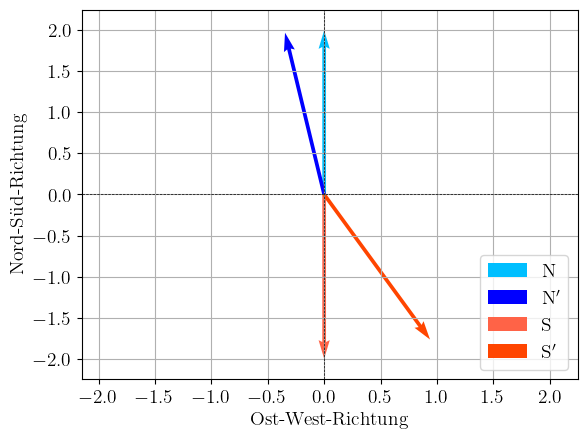

In [6]:
north = 2
east = 0.2
south = 2
west = 1.0

plot_signal_direction(north, east, south, west)